In [1]:
import pandas as pd

C:\Users\Acer\AppData\Local\Temp\ipykernel_9992\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('real_estate_valuation_data_set.csv', index_col=0)


In [3]:
data.shape

(414, 7)

In [5]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


- **TV**: gasto en publicidad en TV
- **Radio**: gasto en publicidad en radio
- **Newspaper**: gasto en publicidad en periódico
  
Todos en miles de dólares

- **Sales**: ventas del producto publicitado en miles de unidades

### Estadísticas descriptivas

In [6]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Incluir seaborn para Visualización

In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

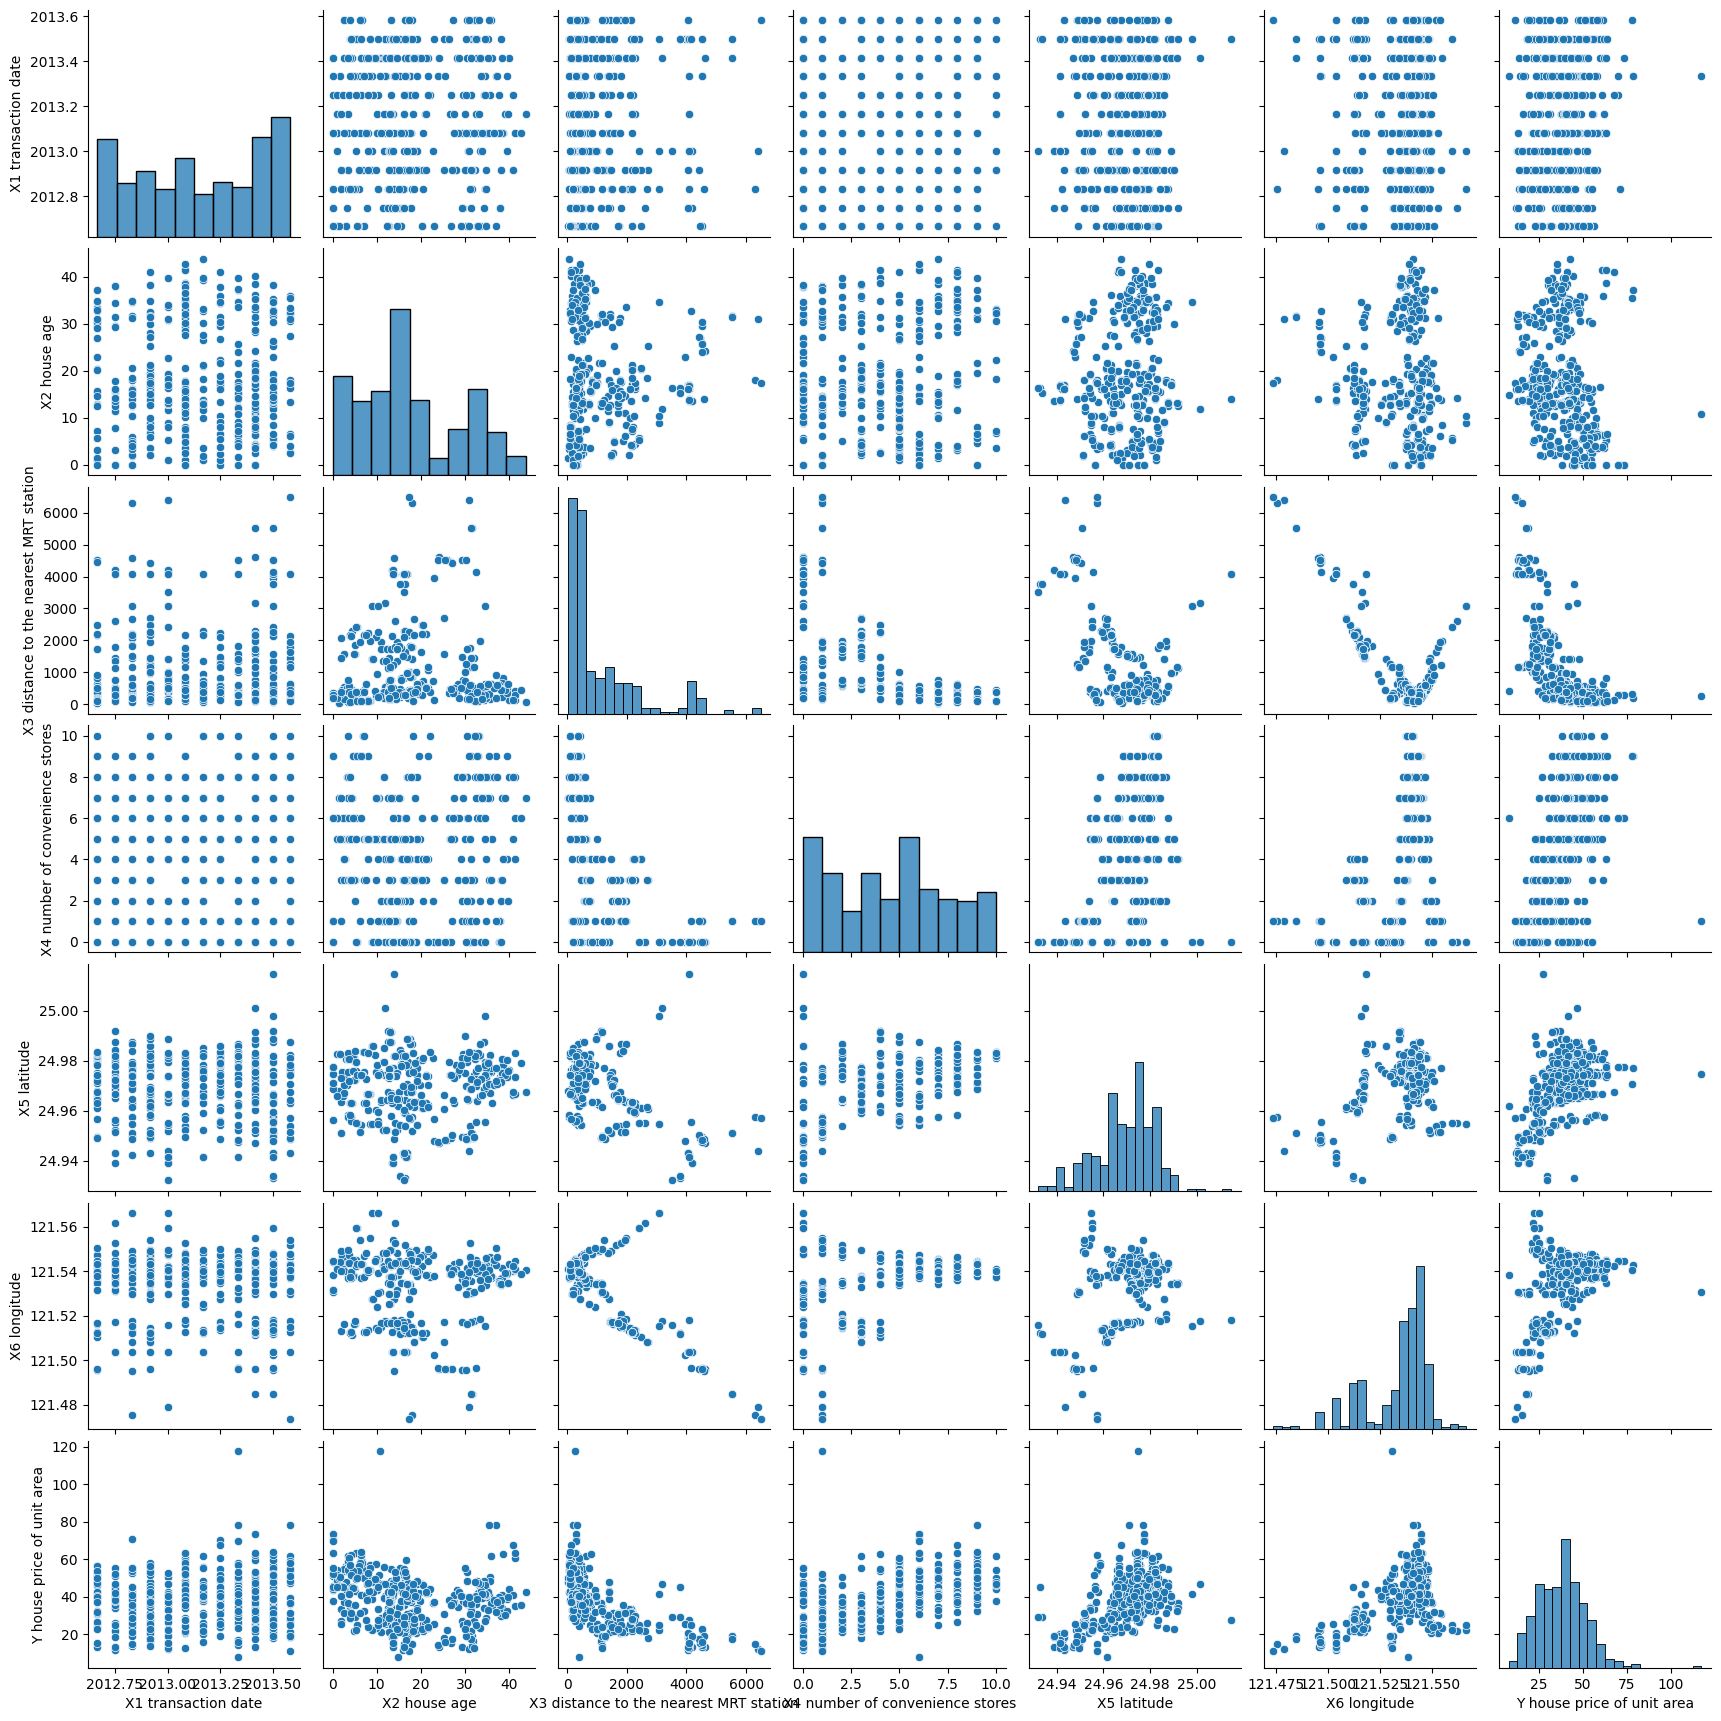

In [9]:
#Imprime los gráficos de dispersión entre columnas para ver su relación
sns.pairplot(data,)

### Matriz de correlación

<Axes: >

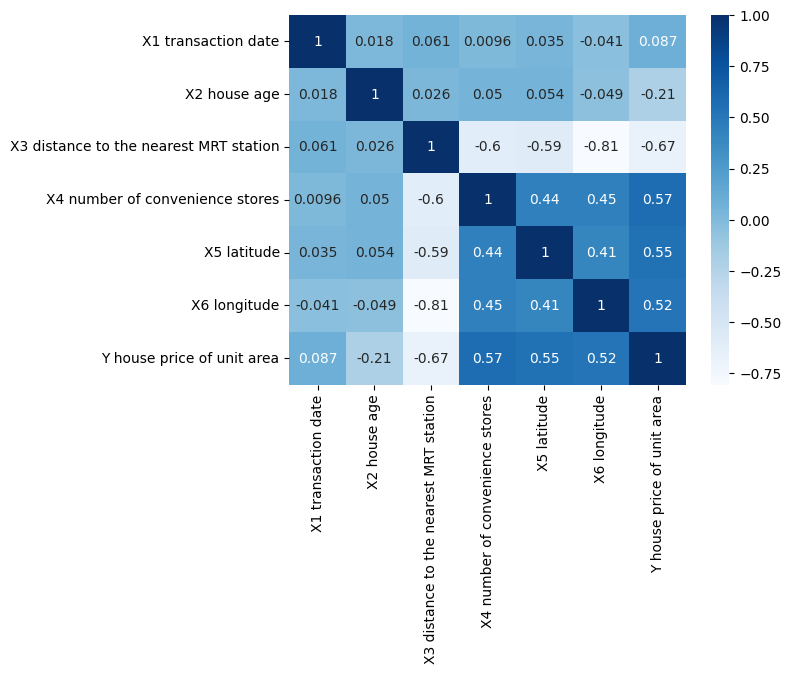

In [10]:
#Para ver la correlación entre variables
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

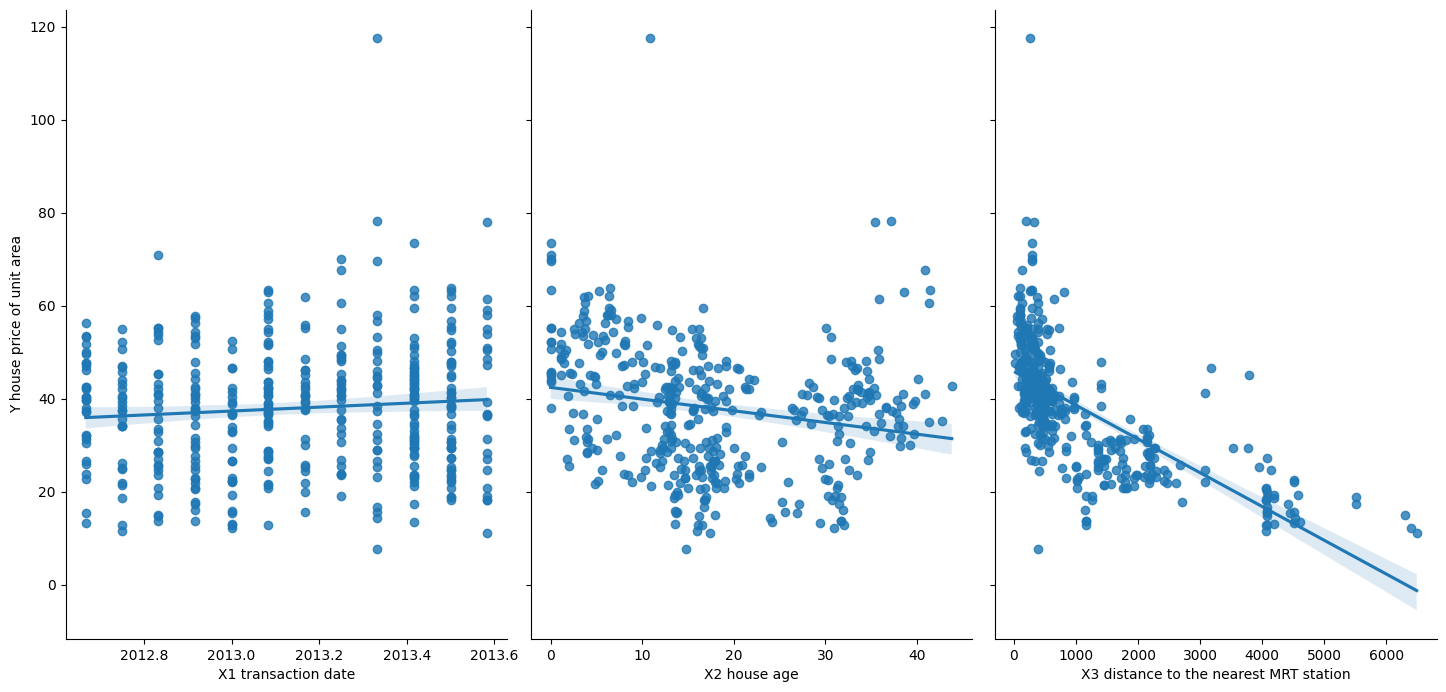

In [11]:
#Graficas la tendencia entre la variable de interés y las demás variables
sns.pairplot(data, x_vars=['X1 transaction date','X2 house age','X3 distance to the nearest MRT station'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

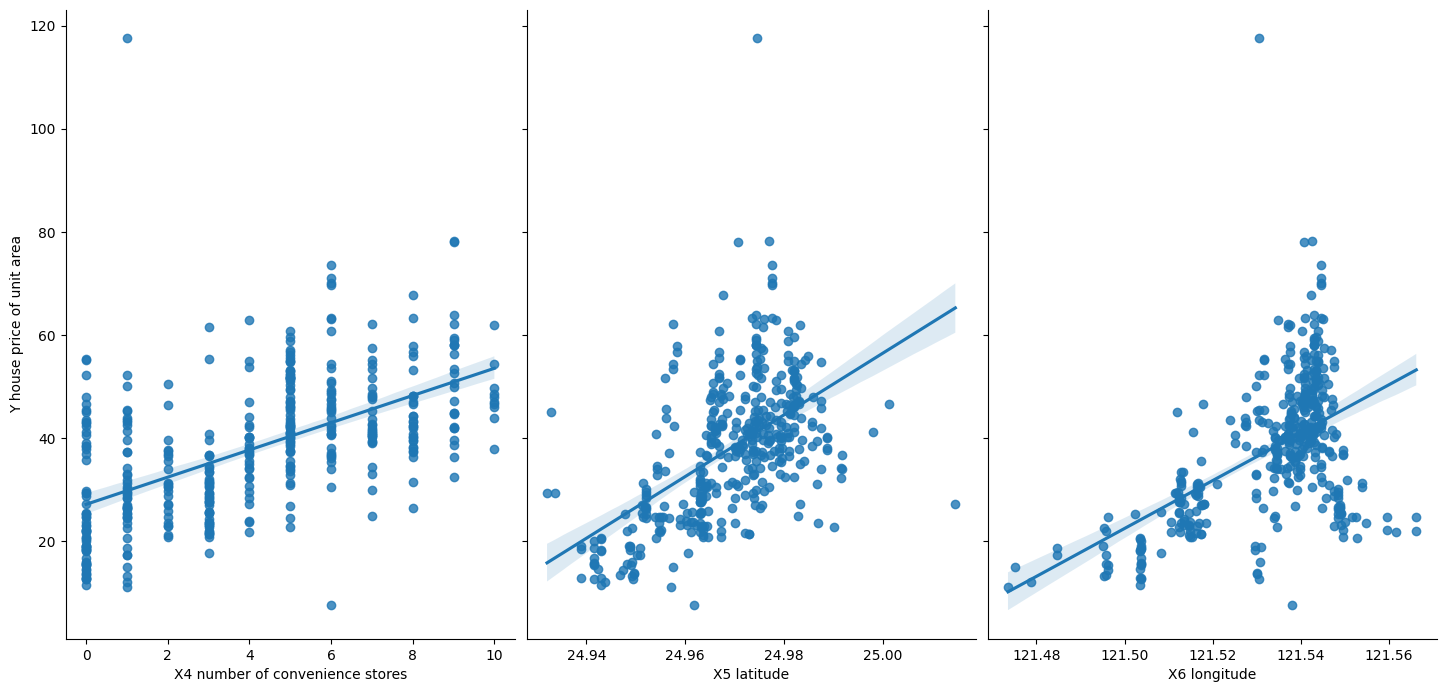

In [12]:
#Graficas la tendencia entre la variable de interés y las demás variables
sns.pairplot(data, x_vars=['X4 number of convenience stores','X5 latitude','X6 longitude'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

### Modelo de regresión 

$y = \beta_0 + \beta_1 \times \text{TV} + \beta_2 \times \text{Radio} + \beta_3 \times \text{Newspaper}$

In [40]:
# nombres de características
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# dataframe de características
X = data[features]

X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [41]:
X.shape

(414, 6)

In [42]:
# variable de respuesta
y = data['Y house price of unit area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [43]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### División entre entrenamiento y prueba

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 6)
(310,)
(104, 6)
(104,)


In [46]:
print(X.head())
print(X_train.head())

    X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
No                                                                              
1              2012.917          32.0                                84.87882   
2              2012.917          19.5                               306.59470   
3              2013.583          13.3                               561.98450   
4              2013.500          13.3                               561.98450   
5              2012.833           5.0                               390.56840   

    X4 number of convenience stores  X5 latitude  X6 longitude  
No                                                              
1                                10     24.98298     121.54024  
2                                 9     24.98034     121.53951  
3                                 5     24.98746     121.54391  
4                                 5     24.98746     121.54391  
5                                 5     24

In [47]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [48]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 6)
(331,)
(83, 6)
(83,)


In [49]:
# sin reordenar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=False)

In [50]:
print(X.head())
print(X_train.head())

    X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
No                                                                              
1              2012.917          32.0                                84.87882   
2              2012.917          19.5                               306.59470   
3              2013.583          13.3                               561.98450   
4              2013.500          13.3                               561.98450   
5              2012.833           5.0                               390.56840   

    X4 number of convenience stores  X5 latitude  X6 longitude  
No                                                              
1                                10     24.98298     121.54024  
2                                 9     24.98034     121.53951  
3                                 5     24.98746     121.54391  
4                                 5     24.98746     121.54391  
5                                 5     24

In [51]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 6)
(310,)
(104, 6)
(104,)


In [52]:
# volviendo al caso en que cambia el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [53]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [54]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

-12796.117684899313
[ 5.71714218e+00 -2.49326467e-01 -4.93769843e-03  1.07614509e+00
  2.27037100e+02 -3.56988335e+01]


In [55]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('X1 transaction date', 5.717142183610284),
 ('X2 house age', -0.24932646689585305),
 ('X3 distance to the nearest MRT station', -0.004937698432022963),
 ('X4 number of convenience stores', 1.076145093445308),
 ('X5 latitude', 227.0371003711649),
 ('X6 longitude', -35.698833465050804)]

### Predicciones usando los datos de prueba

In [56]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [57]:
from sklearn import metrics

In [58]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [59]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.343030944663055
MSE:  45.01050719519454
RMSE:  6.708987046879323


### Selección de variables - Modelo con otro subconjunto de variables

In [38]:
featuresb = ['X2 house age', 'X5 latitude']

X = data[featuresb]
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  7.736203865513499
MSE:  91.77582758468176
RMSE:  9.579970124414887


### Validación cruzada

In [60]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 49.89813853  89.0294996   57.865991   134.82397694  60.0535528 ]


In [61]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.06386145  9.43554448  7.6069699  11.61137274  7.74942274]


In [62]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

8.693434260346574


## Ahora usando statsmodels

In [64]:
import statsmodels.api as sm

features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

X = data[features]
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.543
Model:                                    OLS   Adj. R-squared:                  0.534
Method:                         Least Squares   F-statistic:                     60.00
Date:                        Mon, 12 Feb 2024   Prob (F-statistic):           1.05e-48
Time:                                21:23:35   Log-Likelihood:                -1129.0
No. Observations:                         310   AIC:                             2272.
Df Residuals:                             303   BIC:                             2298.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### El segundo modelo, sin Transaction date y longitud

In [66]:
featuresb = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']

X = data[featuresb]
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.531
Model:                                    OLS   Adj. R-squared:                  0.525
Method:                         Least Squares   F-statistic:                     86.40
Date:                        Mon, 12 Feb 2024   Prob (F-statistic):           5.46e-49
Time:                                21:26:26   Log-Likelihood:                -1132.9
No. Observations:                         310   AIC:                             2276.
Df Residuals:                             305   BIC:                             2294.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### Determinar la influencia de las observaciones

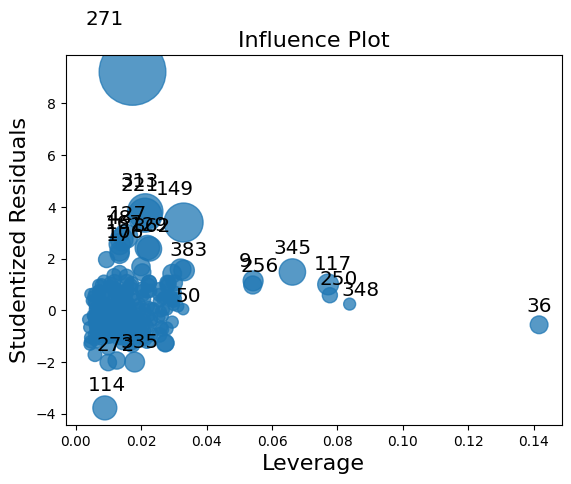

In [67]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [68]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.012903225806451613
Index([313, 271, 335, 106,   9, 362, 345, 129,  48, 114, 117, 195, 221, 149,
       167, 127, 383],
      dtype='int64', name='No') 
 [0.06073804 0.2349225  0.01453702 0.01388456 0.01481567 0.02552282
 0.03099662 0.02583351 0.02101274 0.02444378 0.01673414 0.0165224
 0.05602196 0.07587184 0.01750412 0.02466197 0.01615066]


In [69]:
X_train[out_d]

,const,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude
No,,,,,
313,1.0,35.4,318.5292,9,24.97071
271,1.0,10.8,252.5822,1,24.97460
335,1.0,30.0,1013.3410,5,24.99006
106,1.0,0.0,292.9978,6,24.97744
9,1.0,31.7,5512.0380,1,24.95095
362,1.0,41.4,281.2050,8,24.97345
345,1.0,34.6,3085.1700,0,24.99800
129,1.0,41.3,124.9912,6,24.96674
48,1.0,35.9,640.7391,3,24.97563


In [70]:
y_train[out_d]

No
313     78.0
271    117.5
335     22.8
106     71.0
9       18.8
362     63.3
345     41.2
129     60.7
48      61.5
114      7.6
117     12.2
195     29.3
221     78.3
149     45.1
167     73.6
127     62.9
383     29.3
Name: Y house price of unit area, dtype: float64

In [ ]:
print("SMLs")
print('SDVSF')